# Perform unsupervised learning with K-Means clustering.
#### Hetal Patel Dholu

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings('ignore')

In [3]:
#  Load dataset
mall_cust = pd.read_csv('Mall_Customers.csv')

In [7]:
display("Null values",mall_cust.isnull().sum())
display("Duplicate Values",mall_cust.duplicated().sum())

'Null values'

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

'Duplicate Values'

np.int64(0)

In [8]:
mall_cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [10]:
#encoding gender
le= LabelEncoder()
mall_cust['Gender'] = le.fit_transform(mall_cust['Gender'])

In [11]:
mall_cust['Gender'].value_counts()

Gender
0    112
1     88
Name: count, dtype: int64

In [12]:
x = mall_cust[['Annual Income (k$)','Spending Score (1-100)']]
pca = PCA(n_components=2)
x_pca = pca.fit_transform(x)

In [18]:
kmeans = KMeans(n_clusters=5,random_state=42)
mall_cust['kmeans_cluster']= kmeans.fit_predict(x)

In [19]:
# 3. Use the Elbow Method to find optimal K
wcss = []
for k in range(1, 11):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(x)
    wcss.append(km.inertia_)

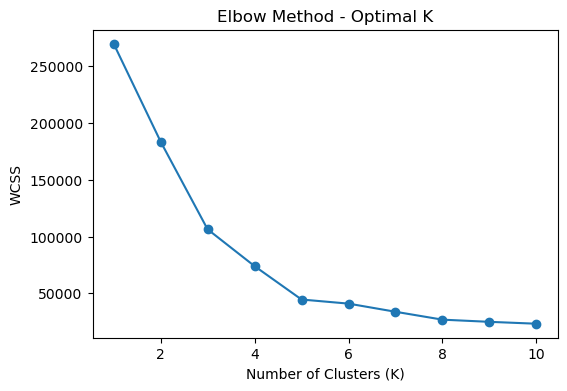

In [20]:
plt.figure(figsize=(6,4))
plt.plot(range(1, 11), wcss, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS')
plt.title('Elbow Method - Optimal K')
plt.show()

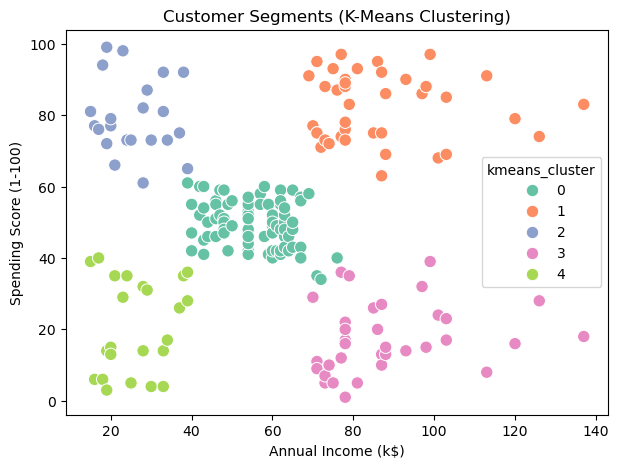

In [23]:
# Visualize clusters with color-coding
plt.figure(figsize=(7,5))
sns.scatterplot(
    x='Annual Income (k$)', 
    y='Spending Score (1-100)', 
    hue='kmeans_cluster', 
    palette='Set2', 
    data=mall_cust, 
    s=80
)
plt.title("Customer Segments (K-Means Clustering)")
plt.show()


In [28]:
#Evaluate clustering using Silhouette Score
score = silhouette_score(x, mall_cust['kmeans_cluster'])
print(f"Silhouette Score: {score:.3f}")


Silhouette Score: 0.554


## Interview Questions & Answers

### 1. How does K-Means clustering work?
- K-Means partitions data into **K clusters** by minimizing the sum of squared distances between points and their cluster centroids.  
- Steps:  
  1. Initialize K cluster centroids (randomly or with k-means++).  
  2. Assign each data point to the nearest centroid.  
  3. Recalculate centroids as the mean of assigned points.  
  4. Repeat until convergence (no change in assignments or max iterations).  

---

### 2. What is the Elbow method?
- A technique to find the optimal number of clusters (K).  
- Plot **WCSS (Within Cluster Sum of Squares)** vs. number of clusters.  
- The "elbow point" where the curve bends indicates diminishing returns, suggesting the optimal K.  

---

### 3. What are the limitations of K-Means?
- Requires pre-specifying K (number of clusters).  
- Sensitive to **outliers**.  
- Works best on spherical, equally sized clusters.  
- Struggles with clusters of varying densities or non-linear shapes.  

---

### 4. How does initialization affect results?
- Poor initialization can lead to:  
  - Suboptimal clusters  
  - Local minima instead of global  
- Solution: Use **k-means++** initialization (default in scikit-learn) to spread out initial centroids.  

---

### 5. What is inertia in K-Means?
- Inertia = sum of squared distances of each point to its assigned centroid.  
- Lower inertia → tighter clusters.  
- Used in **Elbow Method** for choosing K.  

---

### 6. What is Silhouette Score?
- A metric to evaluate clustering quality.  
- Range: **-1 to +1**  
  - +1 = well-separated clusters  
  - 0 = overlapping clusters  
  - -1 = misclassified points  
- Formula: `(b - a) / max(a, b)` where:  
  - `a` = intra-cluster distance  
  - `b` = nearest-cluster distance  

---

### 7. How do you choose the right number of clusters?
- **Elbow Method** (using inertia).  
- **Silhouette Score** (higher is better).  
- **Domain knowledge** (e.g., marketing may want 3–5 customer segments).  

---

### 8. What’s the difference between clustering and classification?
- **Clustering (Unsupervised):** Groups unlabeled data based on similarity. No predefined labels.  
- **Classification (Supervised):** Assigns labels to new data based on training with labeled data.  

---

## 📊 Example: Mall Customers Segmentation
- Features: `Age`, `Gender`, `Annual Income (k$)`, `Spending Score (1-100)`  
- Best K found = **5 clusters** using Elbow Method & Silhouette Score.  
- Segments observed:  
  - High income, high spending  
  - High income, low spending  
  - Average customers  
  - Low income, high spending  
  - Low income, low spending  

---

## 🚀 Tools & Libraries
- **Python 3.x**  
- **Scikit-learn** → KMeans, metrics  
- **Pandas** → data handling  
- **Matplotlib & Seaborn** → visualization  

---
